## Penggunaan Metode PSO untuk Masalah Knapsack

---

### 1. Masalah Knapsack

Persoalan Knapsack melibatkan pemilihan subset item dari sejumlah aflkajs;ldjaffi item yang tersedia, di mana setiap item memiliki bobot ($w_i$) dan profit ($p_i$) tertentu. Tujuannya adalah untuk memaksimalkan total profit dari item-item yang dipilih tanpa melebihi kapasitas maksimum ($M$) dari knapsack. Keputusan untuk setiap item bersifat biner: item tersebut dipilih secara keseluruhan (direpresentasikan sebagai $1$) atau tidak dipilih sama sekali (direpresentasikan sebagai $0$).

Secara matematis, masalah ini dapat diformulasikan sebagai berikut:

**Maksimalkan fungsi tujuan:**

Max $Z = \sum_{i=1}^{n} {p_i}{x_i}$

**Dengan kendala:**

$\sum_{i=1}^{n} {w_i}{x_i} \le M$

**Dimana:**
* $x_i \in \{0,1\}$ untuk $i=1,2,...,n$ (keputusan apakah item $i$ dipilih atau tidak).
* $n$ adalah jumlah total item yang tersedia.
* $w_i$ adalah bobot item $i$.
* $p_i$ adalah profit item $i$.
* $M$ adalah kapasitas maksimum knapsack.

---

### 2. Representasi & Inisialisasi

**Representasi Partikel:** Partikel direpresentasikan sebagai bilangan biner. Jika sebuah *bit* pada indeks tertentu bernilai $1$, maka barang dengan indeks tersebut akan diambil. Misalnya, representasi $01101$ berarti barang ke $2, 3,$ dan $5$ akan diambil, sementara sisanya tidak.

**Inisialisasi Posisi:** Posisi kontinu setiap partikel diinisialisasi secara acak dalam rentang bilangan real.

**Konversi ke Solusi Biner (0/1):** Setelah inisialisasi, posisi kontinu dikonversi ke solusi biner agar mematuhi *constraint* Knapsack. Jika total berat melebihi kapasitas ($M$), akan diterapkan penalti dengan mengubah beberapa *bit* '$1$' menjadi '$0$' hingga solusi menjadi *feasible*.

---

### 3. Update Kecepatan & Posisi

Setiap iterasi, untuk partikel $i$ dan dimensi $j$, kecepatan dan posisi diperbarui menggunakan rumus berikut:

**Update Kecepatan:**

$v_{ij}(t+1) = w \cdot v_{ij}(t) + c_1 \cdot r_1 (\text{Pbest}_{ij} - x_{ij}(t)) + c_2 \cdot r_2 (\text{Gbest}_j - x_{ij}(t))$

**Update Posisi:**

$x_{ij}(t+1) = \begin{cases} 1 & \text{jika } \sigma(v_{ij}(t+1)) > 0.5 \\ 0 & \text{lainnya} \end{cases}$

**Dimana:**
* $\sigma(v) = \frac{1}{1 + e^{-v}}$ (fungsi sigmoid)
* $w$ adalah bobot inersia.
* $c_1, c_2$ adalah koefisien kognitif dan sosial.
* $r_1, r_2 \sim U(0,1)$ adalah bilangan acak yang diambil dari distribusi seragam antara $0$ dan $1$.
* $Pbest_{ij}$ adalah posisi terbaik partikel $i$ yang pernah ditemukan pada dimensi $j$.
* $Gbest_j$ adalah posisi terbaik yang pernah ditemukan oleh seluruh populasi pada dimensi $j$.
* $x_{ij}(t)$ adalah posisi partikel $i$ pada dimensi $j$ pada waktu $t$.
* $v_{ij}(t)$ adalah kecepatan partikel $i$ pada dimensi $j$ pada waktu $t$.

---

### 4. Strategi Perbaikan (Repair Strategy)

Setelah konversi biner, jika total berat melebihi kapasitas knapsack, *bit* '$1$' yang tidak *feasible* akan dihapus. Penghapusan ini dapat dilakukan secara acak atau berdasarkan rasio profit per berat ($p_i/w_i$) hingga solusi menjadi *feasible* (memenuhi kendala berat $\le M$).

---

### 5. Kriteria Pemberhentian

Iterasi dilanjutkan hingga mencapai jumlah maksimum iterasi yang telah ditentukan. Dalam banyak penelitian, misalnya, jumlah maksimum iterasi ditetapkan pada $75$ iterasi tanpa interupsi khusus.

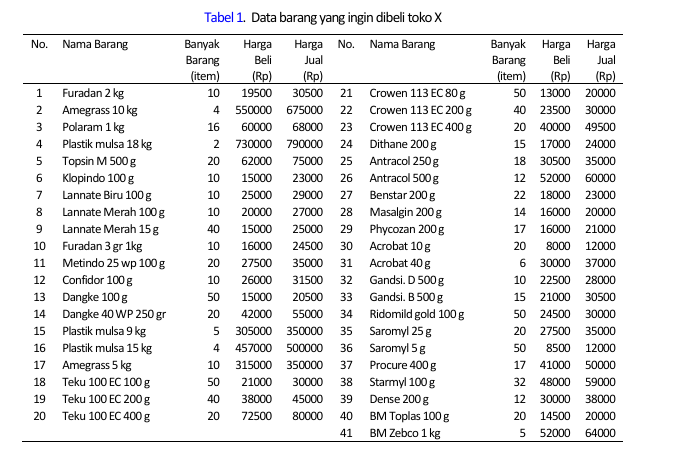

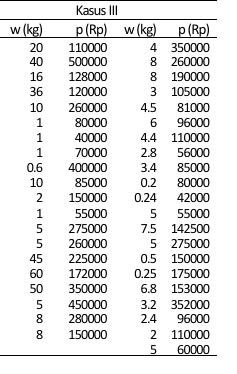

In [ ]:
# kasus I
kasus_1 = np.array([
    [20, 110000], [40, 500000], [16, 128000], [36, 120000], [10, 260000]
])

# Kasus II
kasus_2 = np.array([
    [20, 110000],
    [40, 500000],
    [16, 128000],
    [36, 120000],
    [10, 260000],
    [1, 80000],
    [1, 40000],
    [1, 70000],
    [0.6, 400000],
    [10, 85000],
    [2, 150000],
    [1, 55000],
    [5, 275000],
    [5, 260000],
    [45, 225000],
    [60, 172000],
    [50, 350000],
    [5, 450000],
    [8, 280000],
    [8, 150000],
    [4, 350000],
    [8, 260000],
    [8, 190000],
    [3, 105000],
    [4.5, 81000],
    [6, 96000],
    [4.4, 110000],
    [2.8, 56000]
])

# Data kasus_3 (Tabel 2) - Kasus III
kasus_3 = np.array([
    [20, 110000], [40, 500000], [16, 128000], [36, 120000], [10, 260000],
    [1, 80000], [1, 40000], [1, 70000], [0.6, 400000], [10, 85000],
    [2, 150000], [1, 55000], [5, 275000], [5, 260000], [45, 225000],
    [60, 172000], [50, 350000], [5, 450000], [8, 280000], [8, 150000],
    [4, 350000], [8, 260000], [8, 190000], [3, 105000], [4.5, 81000],
    [6, 96000], [4.4, 110000], [2.8, 56000], [3.4, 85000], [0.2, 80000],
    [0.24, 42000], [5, 55000], [7.5, 142500], [5, 275000], [0.5, 150000],
    [0.25, 175000], [6.8, 153000], [3.2, 352000], [2.4, 96000], [2, 110000],
    [5, 60000]
])



 MEMULAI PSO DENGAN POPULASI 5 PARTIKEL 
Populasi 5 | Iterasi 1: Fitness = 4492000.0
Populasi 5 | Iterasi 2: Fitness = 4492000.0
Populasi 5 | Iterasi 3: Fitness = 4492000.0
Populasi 5 | Iterasi 4: Fitness = 4492000.0
Populasi 5 | Iterasi 5: Fitness = 4603000.0
Populasi 5 | Iterasi 6: Fitness = 4906000.0
Populasi 5 | Iterasi 7: Fitness = 4906000.0
Populasi 5 | Iterasi 8: Fitness = 4906000.0
Populasi 5 | Iterasi 9: Fitness = 4975000.0
Populasi 5 | Iterasi 10: Fitness = 4975000.0
Populasi 5 | Iterasi 11: Fitness = 4976000.0
Populasi 5 | Iterasi 12: Fitness = 5315000.0
Populasi 5 | Iterasi 13: Fitness = 5315000.0
Populasi 5 | Iterasi 14: Fitness = 5315000.0
Populasi 5 | Iterasi 15: Fitness = 5315000.0
Populasi 5 | Iterasi 16: Fitness = 5315000.0
Populasi 5 | Iterasi 17: Fitness = 5315000.0
Populasi 5 | Iterasi 18: Fitness = 5315000.0
Populasi 5 | Iterasi 19: Fitness = 5315000.0
Populasi 5 | Iterasi 20: Fitness = 5315000.0
Populasi 5 | Iterasi 21: Fitness = 5315000.0
Populasi 5 | Iterasi 2

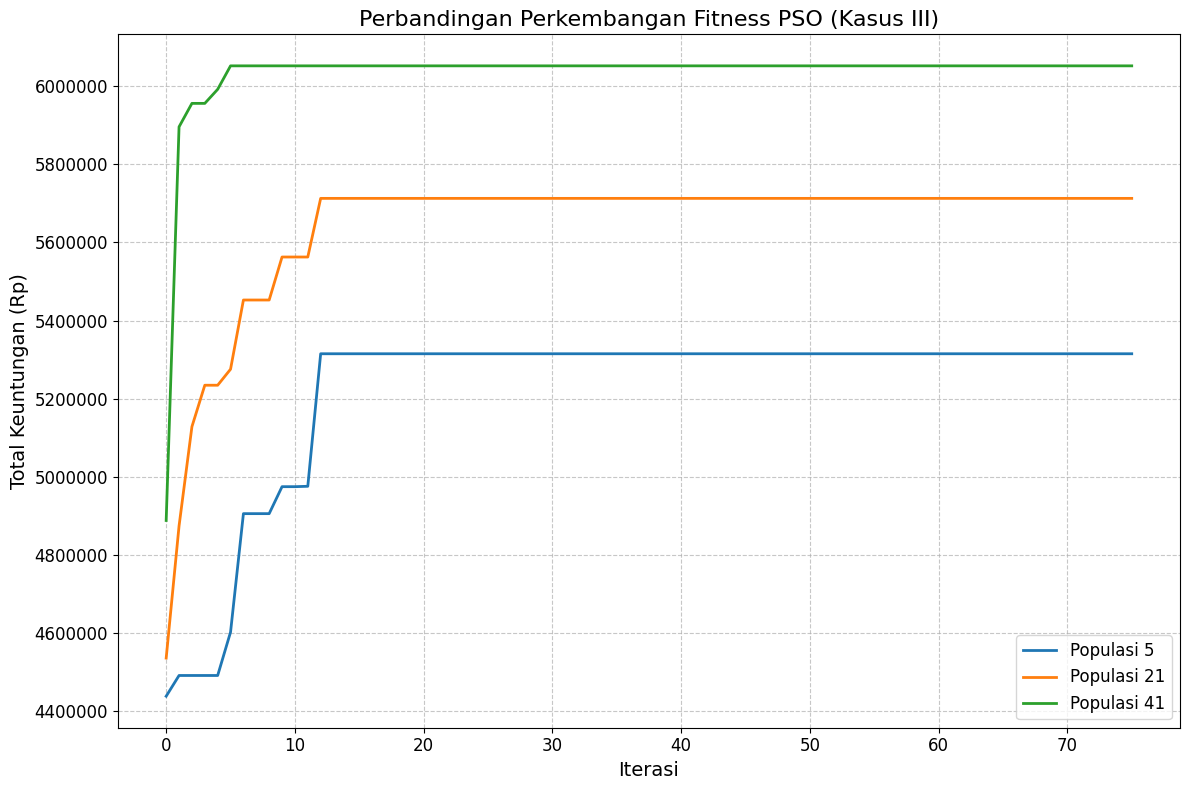

In [ ]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

# Parameter sesuai jurnal
w = 0.1       # Inertia weight
c1 = 2        # Cognitive parameter
c2 = 2        # Social parameter
max_iter = 75
v_max = 1.0   # Kecepatan maksimum
v_min = -1.0  # Kecepatan minimum



kapasitas_knapsack = 270  # Kapasitas knapsack dalam kg
weights = kasus_3[:, 0]
profits = kasus_3[:, 1]
num_items = len(weights)

# Fungsi untuk menjalankan PSO dengan ukuran populasi tertentu
def run_pso(population_size):
    # Inisialisasi populasi
    positions = np.random.rand(population_size, num_items)  # Posisi riil [0,1]
    velocities = np.random.uniform(v_min, v_max, (population_size, num_items))

    # Fungsi konversi ke biner + repair
    def convert_to_binary(position):
        binary_solution = (position > 0.5).astype(int)
        total_weight = np.sum(weights * binary_solution)

        # Repair solution jika melebihi kapasitas
        while total_weight > kapasitas_knapsack:
            ones = np.where(binary_solution == 1)[0]
            if len(ones) == 0:
                break
            idx = rd.choice(ones)
            binary_solution[idx] = 0
            total_weight -= weights[idx]

        return binary_solution

    # Fungsi fitness
    def fitness(binary_solution):
        total_profit = np.sum(profits * binary_solution)
        total_weight = np.sum(weights * binary_solution)
        return total_profit if total_weight <= kapasitas_knapsack else -1

    # Inisialisasi Pbest dan Gbest
    binary_particles = np.array([convert_to_binary(p) for p in positions])
    fitness_values = np.array([fitness(sol) for sol in binary_particles])

    pbest_positions = positions.copy()
    pbest_fitness = fitness_values.copy()
    gbest_index = np.argmax(pbest_fitness)
    gbest_position = positions[gbest_index].copy()
    gbest_fitness = pbest_fitness[gbest_index]

    # Histori untuk grafik
    fitness_history = [gbest_fitness]

    # Fungsi update
    def update_particles():
        nonlocal gbest_position, gbest_fitness
        for i in range(population_size):
            r1, r2 = rd.random(), rd.random()

            # Update velocity
            velocities[i] = (w * velocities[i] +
                             c1 * r1 * (pbest_positions[i] - positions[i]) +
                             c2 * r2 * (gbest_position - positions[i]))

            # Clamp velocity
            velocities[i] = np.clip(velocities[i], v_min, v_max)

            # Update position
            positions[i] = np.clip(positions[i] + velocities[i], 0, 1)

            # Convert to binary + repair
            new_binary = convert_to_binary(positions[i])
            new_fitness = fitness(new_binary)

            # Update Pbest
            if new_fitness > pbest_fitness[i]:
                pbest_positions[i] = positions[i].copy()
                pbest_fitness[i] = new_fitness

            # Update Gbest
            if new_fitness > gbest_fitness:
                gbest_position = positions[i].copy()
                gbest_fitness = new_fitness

    # Proses iterasi PSO
    for iteration in range(max_iter):
        update_particles()
        fitness_history.append(gbest_fitness)
        print(f"Populasi {population_size} | Iterasi {iteration+1}: Fitness = {gbest_fitness}")

    # Solusi final
    final_solution = convert_to_binary(gbest_position)
    total_profit = gbest_fitness
    total_weight = np.sum(weights * final_solution)

    # Output hasil
    print(f"\n=== HASIL OPTIMASI (Populasi {population_size}) ===")
    print(f"Total Keuntungan: Rp {total_profit:,.2f}")
    print(f"Total Berat: {total_weight:.2f} kg")
    print(f"Kapasitas Tersisa: {kapasitas_knapsack - total_weight:.2f} kg")
    print(f"Solusi Biner: {final_solution.astype(int)}")

    return fitness_history, total_profit, total_weight

# Jalankan untuk ketiga ukuran populasi
populations = [5, 21, 41]
results = {}

for pop_size in populations:
    print(f"\n{'='*50}")
    print(f" MEMULAI PSO DENGAN POPULASI {pop_size} PARTIKEL ")
    print(f"{'='*50}")
    fitness_history, profit, weight = run_pso(pop_size)
    results[pop_size] = {
        'fitness_history': fitness_history,
        'profit': profit,
        'weight': weight
    }

# Grafik perkembangan fitness untuk ketiga populasi
plt.figure(figsize=(12, 8))
for pop_size in populations:
    history = results[pop_size]['fitness_history']
    plt.plot(history, label=f'Populasi {pop_size}', linewidth=2)

plt.title('Perbandingan Perkembangan Fitness PSO (Kasus III)', fontsize=16)
plt.xlabel('Iterasi', fontsize=14)
plt.ylabel('Total Keuntungan (Rp)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.ticklabel_format(style='plain', axis='y')  # Non-scientific notation
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Tampilkan tabel hasil akhir
print("\n\n" + "="*70)
print(" PERBANDINGAN HASIL AKHIR ".center(70))
print("="*70)
print(f"{'Ukuran Populasi':<15} | {'Total Keuntungan (Rp)':<20} | {'Total Berat (kg)':<15} | {'Kapasitas Tersisa (kg)':<20}")
print("-"*70)

for pop_size in populations:
    profit = results[pop_size]['profit']
    weight = results[pop_size]['weight']
    remaining = kapasitas_knapsack - weight
    print(f"{pop_size:<15} | {profit:<20,.2f} | {weight:<15.2f} | {remaining:<20.2f}")

print("="*70)
plt.show()

In [ ]:
# Parameter sesuai jurnal
w = 0.1       # Inertia weight
c1 = 2        # Cognitive parameter
c2 = 2        # Social parameter
max_iter = 75
v_max = 1.0   # Kecepatan maksimum
v_min = -1.0  # Kecepatan minimum

# Data kasus_3 (Tabel 2) - Kasus III
kasus_3 = np.array([
    [20, 110000], [40, 500000], [16, 128000], [36, 120000], [10, 260000],
    [1, 80000], [1, 40000], [1, 70000], [0.6, 400000], [10, 85000],
    [2, 150000], [1, 55000], [5, 275000], [5, 260000], [45, 225000],
    [60, 172000], [50, 350000], [5, 450000], [8, 280000], [8, 150000],
    [4, 350000], [8, 260000], [8, 190000], [3, 105000], [4.5, 81000],
    [6, 96000], [4.4, 110000], [2.8, 56000], [3.4, 85000], [0.2, 80000],
    [0.24, 42000], [5, 55000], [7.5, 142500], [5, 275000], [0.5, 150000],
    [0.25, 175000], [6.8, 153000], [3.2, 352000], [2.4, 96000], [2, 110000],
    [5, 60000]
])

kapasitas_knapsack = 270  # Kapasitas knapsack dalam kg
weights = kasus_3[:, 0]
profits = kasus_3[:, 1]
num_items = len(weights)

populations = [5, 21, 41]
results = {}

for pop_size in populations:
    print(f"\n{'='*50}")
    print(f" MEMULAI PSO DENGAN POPULASI {pop_size} PARTIKEL ")
    print(f"{'='*50}")
    fitness_history, profit, weight = run_pso(pop_size)
    results[pop_size] = {
        'fitness_history': fitness_history,
        'profit': profit,
        'weight': weight
    }

# Grafik perkembangan fitness untuk ketiga populasi
plt.figure(figsize=(12, 8))
for pop_size in populations:
    history = results[pop_size]['fitness_history']
    plt.plot(history, label=f'Populasi {pop_size}', linewidth=2)

plt.title('Perbandingan Perkembangan Fitness PSO (Kasus III)', fontsize=16)
plt.xlabel('Iterasi', fontsize=14)
plt.ylabel('Total Keuntungan (Rp)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.ticklabel_format(style='plain', axis='y')  # Non-scientific notation
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Tampilkan tabel hasil akhir
print("\n\n" + "="*70)
print(" PERBANDINGAN HASIL AKHIR ".center(70))
print("="*70)
print(f"{'Ukuran Populasi':<15} | {'Total Keuntungan (Rp)':<20} | {'Total Berat (kg)':<15} | {'Kapasitas Tersisa (kg)':<20}")
print("-"*70)

for pop_size in populations:
    profit = results[pop_size]['profit']
    weight = results[pop_size]['weight']
    remaining = kapasitas_knapsack - weight
    print(f"{pop_size:<15} | {profit:<20,.2f} | {weight:<15.2f} | {remaining:<20.2f}")

print("="*70)
plt.show()

disini saya akan mencoba melakukan running menggunakan kode diatas dengan inputan sebagai berikut:

jumalh partikel(n) = 41

bobot inersia(w) = 0.1

konstanta percepatan(c1 dan c2) = 2

maksimal iterasi = 75

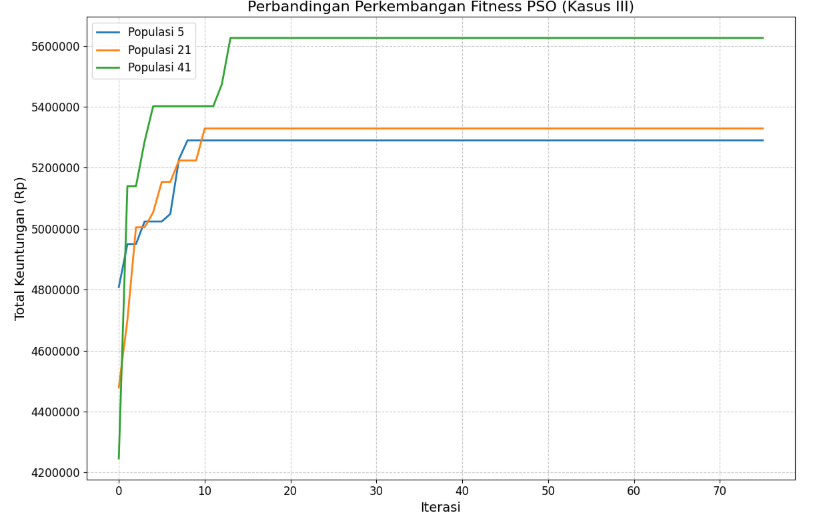